In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Using the MNIST handwritten digits dataset

In [52]:
mnist = tf.keras.datasets.mnist

In [53]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [55]:
x_train.shape

(60000, 28, 28)

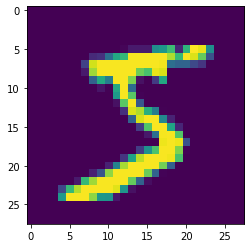

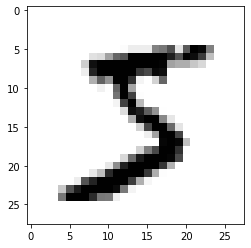

In [56]:
plt.imshow(x_train[0]);
plt.show();
plt.imshow(x_train[0], cmap=plt.cm.binary);

In [57]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalizing Data

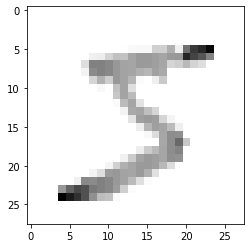

In [58]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis =1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [60]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [61]:
print(y_train[0])

5


## Resizing image to make it suitable for convolution

In [62]:
import numpy as np
IMG_SIZE = 28
#Increasing one dimension for kernel operation
x_train = np.array(x_train).reshape(-1,IMG_SIZE, IMG_SIZE,1)
x_test = np.array(x_test).reshape(-1,IMG_SIZE, IMG_SIZE,1)
print('Train sample dimension', x_train.shape)
print('Test sample dimension', x_test.shape)

Train sample dimension (60000, 28, 28, 1)
Test sample dimension (10000, 28, 28, 1)


## Neural Network Architecture

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [64]:
model = Sequential();

#First convolution layer
model.add(Conv2D(64,(3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 

# Second convolution layer
model.add(Conv2D(64,(3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 

# Third convolution layer
model.add(Conv2D(64,(3,3), input_shape=x_train.shape[1:]))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully connected layer #1
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu'))

#Fully connected layer #2
model.add(Dense(32))
model.add(Activation('relu'))

# Last fully connected layer. Last layer must be equal to number of classes
model.add(Dense(10))
model.add(Activation('softmax'))

In [65]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_33 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_34 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                

In [66]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.3291 - accuracy: 0.8978 - val_loss: 0.1578 - val_accuracy: 0.9511
Epoch 2/5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.1068 - accuracy: 0.9671 - val_loss: 0.0845 - val_accuracy: 0.9744
Epoch 3/5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0760 - accuracy: 0.9766 - val_loss: 0.0718 - val_accuracy: 0.9784
Epoch 4/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0580 - accuracy: 0.9819 - val_loss: 0.0666 - val_accuracy: 0.9799
Epoch 5/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0474 - accuracy: 0.9849 - val_loss: 0.0615 - val_accuracy: 0.9809


In [69]:
test_loss , test_accuracy = model.evaluate(x_test,y_test)
print('Test loss', test_loss)
print('Test accuracy', test_accuracy)

313/313 [==============================] - 1s 5ms/step - loss: 0.0536 - accuracy: 0.9840
Test loss 0.0535769946873188
Test accuracy 0.984000027179718


In [70]:
prediction = model.predict([x_test])

In [71]:
print(prediction)

[[5.7728500e-10 8.5351172e-07 3.5493938e-06 ... 9.9999523e-01
  1.3297368e-09 2.9149959e-07]
 [1.2691058e-05 2.2977029e-07 9.9998426e-01 ... 3.5214129e-07
  7.1468708e-07 7.8632256e-10]
 [2.9433754e-06 9.9993396e-01 1.4272108e-06 ... 3.7622031e-05
  4.9312735e-07 1.3504830e-06]
 ...
 [1.7290519e-08 2.8822107e-08 6.9388412e-10 ... 3.3924132e-06
  2.4293433e-08 9.4534525e-06]
 [3.5529618e-05 5.7408698e-08 7.3964507e-08 ... 5.0158118e-08
  8.9672976e-04 1.8527939e-05]
 [2.0408822e-04 1.2652556e-09 4.0831037e-05 ... 1.2162048e-08
  6.8389744e-07 1.6901839e-07]]


In [75]:
print(np.argmax(prediction[128]))

8


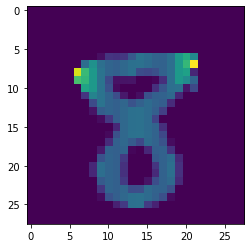

In [77]:
plt.imshow(x_test[128]);

## Testing with own handwritten Image

In [122]:
import cv2

def predict_number_from_image(img) : 
    img = cv2.imread(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray,(28,28), interpolation=cv2.INTER_AREA)
    predict_number = tf.keras.utils.normalize(resized, axis=1)
    predict_number  = np.array(predict_number).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict(predict_number)
    plt.imshow(img);
    print(f'The number in the given image is : {np.argmax(prediction)}');

The number in the given image is : 4


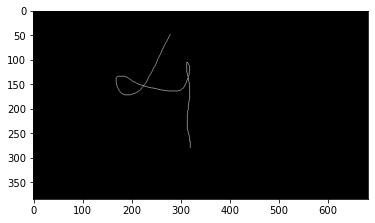

In [123]:
predict_number_from_image('./handwritten_numbers/four.png')

The number in the given image is : 8


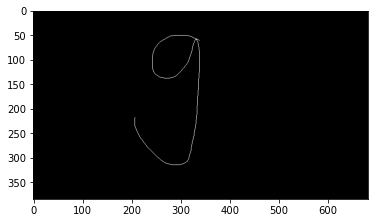

In [124]:
predict_number_from_image('./handwritten_numbers/nine.png')

The number in the given image is : 8


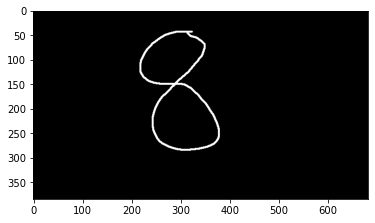

In [125]:
predict_number_from_image('./handwritten_numbers/eight.png')

The number in the given image is : 2


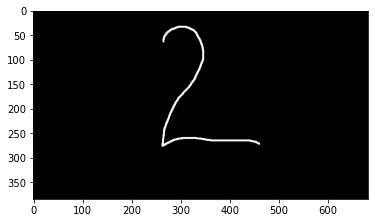

In [126]:
predict_number_from_image('./handwritten_numbers/two.png')